 here i will generate the input for bypass from the vcf file generates by slim 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import math 
import os

import allel
import subprocess

In [2]:
allele_counts_slim_full_cov = pd.read_csv('../allele_counts_slim_full_cov.csv').set_index('Unnamed: 0')


In [3]:
allele_counts_slim_full_cov

,ref_subp0,alt_subp0,ref_subp1,alt_subp1,ref_subp2,alt_subp2,ref_subp3,alt_subp3,ref_subp4,alt_subp4,...,ref_subp11,alt_subp11,ref_subp12,alt_subp12,ref_subp13,alt_subp13,ref_subp14,alt_subp14,ref_subp15,alt_subp15
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
6063,162,838,134,866,141,859,119,881,239,293,...,117,883,68,932,146,854,23,883,283,717
13538,520,480,462,538,318,682,528,472,259,273,...,430,570,92,908,485,515,245,661,662,338
19532,208,792,260,740,157,843,132,868,239,293,...,177,823,68,932,276,724,123,783,438,562
19931,975,25,840,160,911,89,906,94,2770,0,...,838,162,689,311,866,134,894,12,945,55
23006,974,26,825,175,881,119,972,28,2770,0,...,999,1,876,124,936,64,3499,0,882,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28167692,4972,0,5335,0,5422,0,5458,0,2770,0,...,5749,0,4788,0,5034,0,3499,0,982,18
30057156,4972,0,5335,0,5422,0,5458,0,2770,0,...,5749,0,4788,0,5034,0,3499,0,982,18
30065201,4972,0,5335,0,5422,0,5458,0,2770,0,...,5749,0,4788,0,5034,0,3499,0,982,18


In [7]:
## i might need not only the allele freq but the allele count so just exportign the same dataframe to the lea forlder 

allele_counts_slim_full_cov.to_csv('slim_grenenet/allele_counts.csv', header=None , index= None, sep=',')

In [8]:
allele_counts_slim_full_cov

,ref_subp0,alt_subp0,ref_subp1,alt_subp1,ref_subp2,alt_subp2,ref_subp3,alt_subp3,ref_subp4,alt_subp4,...,ref_subp11,alt_subp11,ref_subp12,alt_subp12,ref_subp13,alt_subp13,ref_subp14,alt_subp14,ref_subp15,alt_subp15
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
6063,162,838,134,866,141,859,119,881,239,293,...,117,883,68,932,146,854,23,883,283,717
13538,520,480,462,538,318,682,528,472,259,273,...,430,570,92,908,485,515,245,661,662,338
19532,208,792,260,740,157,843,132,868,239,293,...,177,823,68,932,276,724,123,783,438,562
19931,975,25,840,160,911,89,906,94,2770,0,...,838,162,689,311,866,134,894,12,945,55
23006,974,26,825,175,881,119,972,28,2770,0,...,999,1,876,124,936,64,3499,0,882,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28167692,4972,0,5335,0,5422,0,5458,0,2770,0,...,5749,0,4788,0,5034,0,3499,0,982,18
30057156,4972,0,5335,0,5422,0,5458,0,2770,0,...,5749,0,4788,0,5034,0,3499,0,982,18
30065201,4972,0,5335,0,5422,0,5458,0,2770,0,...,5749,0,4788,0,5034,0,3499,0,982,18


In [9]:
subps = allele_counts_slim_full_cov.columns
subps = [i[4:] for i in subps]

In [10]:
# calculate the frequency of the reference allele 
allele_freq = pd.DataFrame()
for subp in subps:
    allele_freq[subp] = allele_counts_slim_full_cov['ref_' + subp]/allele_counts_slim_full_cov[['ref_' + subp, 'alt_' + subp]].sum(axis=1)


In [12]:
allele_freq

,subp0,subp1,subp2,subp3,subp4,subp5,subp6,subp7,subp8,subp9,subp10,subp11,subp12,subp13,subp14,subp15
Unnamed: 0,,,,,,,,,,,,,,,,
6063,0.162,0.134,0.141,0.119,0.449248,0.276,0.119,0.117,0.123,0.009324,0.012,0.117,0.068,0.146,0.025386,0.283
13538,0.520,0.462,0.318,0.528,0.486842,0.603,0.474,0.579,0.552,0.793706,0.624,0.430,0.092,0.485,0.270419,0.662
19532,0.208,0.260,0.157,0.132,0.449248,0.407,0.207,0.412,0.215,0.247086,0.185,0.177,0.068,0.276,0.135762,0.438
19931,0.975,0.840,0.911,0.906,1.000000,0.909,1.000,0.982,1.000,0.976690,0.842,0.838,0.689,0.866,0.986755,0.945
23006,0.974,0.825,0.881,0.972,1.000000,1.000,1.000,0.996,0.994,0.835664,0.974,0.999,0.876,0.936,1.000000,0.882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28167692,1.000,1.000,1.000,1.000,1.000000,1.000,1.000,1.000,1.000,1.000000,1.000,1.000,1.000,1.000,1.000000,0.982
30057156,1.000,1.000,1.000,1.000,1.000000,1.000,1.000,1.000,1.000,1.000000,1.000,1.000,1.000,1.000,1.000000,0.982
30065201,1.000,1.000,1.000,1.000,1.000000,1.000,1.000,1.000,1.000,1.000000,1.000,1.000,1.000,1.000,1.000000,0.982


In [13]:
## trasnpose since that si the format that lfmm asks for 
allele_freq = allele_freq.T.round(4)  ## rounding might produce invariant sites

In [14]:
### ok ok interesting i found a few sites that have the same values in all the rows, maybe is based on deleting some decimalssssss

for col in allele_freq.columns:
    if allele_freq[col].nunique() == 1:
        print(f"Column {col} has the same value for all the rows.")

Column 5527968 has the same value for all the rows.
Column 5692967 has the same value for all the rows.
Column 14333510 has the same value for all the rows.
Column 15982422 has the same value for all the rows.
Column 19810532 has the same value for all the rows.
Column 21147156 has the same value for all the rows.
Column 22311305 has the same value for all the rows.
Column 26576976 has the same value for all the rows.
Column 30286068 has the same value for all the rows.
Column 30348549 has the same value for all the rows.


In [15]:
##delete them 
all_same = []
for col in allele_freq.columns:
    if allele_freq[col].nunique() == 1:
        all_same.append(col)

allele_freq = allele_freq.drop(columns=all_same)

In [ ]:
allele_freq.to_csv('slim_grenenet/allele_freq.csv', header=None , index= None, sep=',')

In [32]:
## and now the environment 
optima_ecotypes = pd.read_csv('../optima_ecotypes.csv')

In [34]:
temperature = optima_ecotypes['bio1']

In [36]:
temperature.to_csv('slim_grenenet/env.env', header=None , index= None, sep = "\n")

Analayzing results

In [3]:
outlier_snp = pd.read_csv('slim_grenenet/log10p_values_snps')

In [4]:
outlier_snp.columns = ['snp', 'p_value']

In [16]:
outlier_snp['snp_pos'] = allele_freq.T.index

In [17]:
selected_by_flmm = outlier_snp.sort_values(by= 'p_value', ascending=False).head(200)['snp_pos']

In [19]:
## momento de verdad 
selection_coef_qtl1 = pd.read_csv('../selection_coef_qtl1_contrib.bed',sep = '\t', header=None)

In [20]:

## check com ocarajo era la relacion entre pos en slim y fasta o wahtever 
selection_coef_qtl1 = selection_coef_qtl1[[2,3]]

In [21]:
selection_coef_qtl1.columns = ['pos', 'sc']

In [22]:
identified_snps = selection_coef_qtl1.merge(outlier_snp, left_on= 'pos', right_on='snp_pos')

<AxesSubplot:xlabel='sc', ylabel='p_value'>

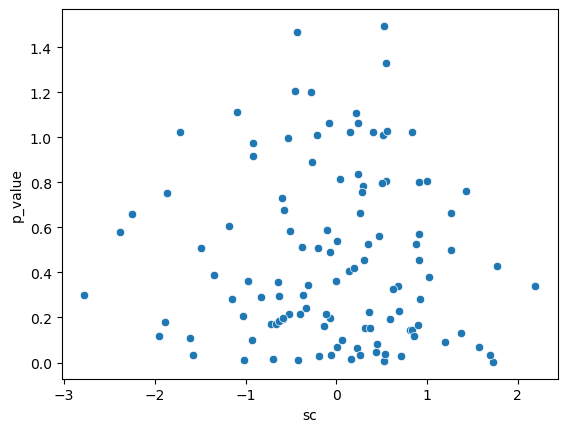

In [23]:
sns.scatterplot(data = identified_snps, x ='sc', y ='p_value')

In [24]:
outlier_snp["is_in_og"] = outlier_snp["snp_pos"].apply(lambda x: x in selection_coef_qtl1['pos'].tolist())

In [25]:
outlier_snp

,snp,p_value,snp_pos,is_in_og
0,Response V1.value,1.332912,6063,False
1,Response V2.value,0.131031,13538,False
2,Response V3.value,0.374963,19532,False
3,Response V4.value,0.427950,19931,False
4,Response V5.value,0.186762,23006,False
...,...,...,...,...
10918,Response V10919.value,0.339282,28167692,False
10919,Response V10920.value,0.339282,30057156,False
10920,Response V10921.value,0.339282,30065201,False
10921,Response V10922.value,0.339282,30325819,False


In [26]:
# Map the True/False values to grey/blue
color_map = {True: "red", False: "grey"}
outlier_snp["color"] = outlier_snp["is_in_og"].map(color_map)

In [27]:
outlier_snp

,snp,p_value,snp_pos,is_in_og,color
0,Response V1.value,1.332912,6063,False,grey
1,Response V2.value,0.131031,13538,False,grey
2,Response V3.value,0.374963,19532,False,grey
3,Response V4.value,0.427950,19931,False,grey
4,Response V5.value,0.186762,23006,False,grey
...,...,...,...,...,...
10918,Response V10919.value,0.339282,28167692,False,grey
10919,Response V10920.value,0.339282,30057156,False,grey
10920,Response V10921.value,0.339282,30065201,False,grey
10921,Response V10922.value,0.339282,30325819,False,grey


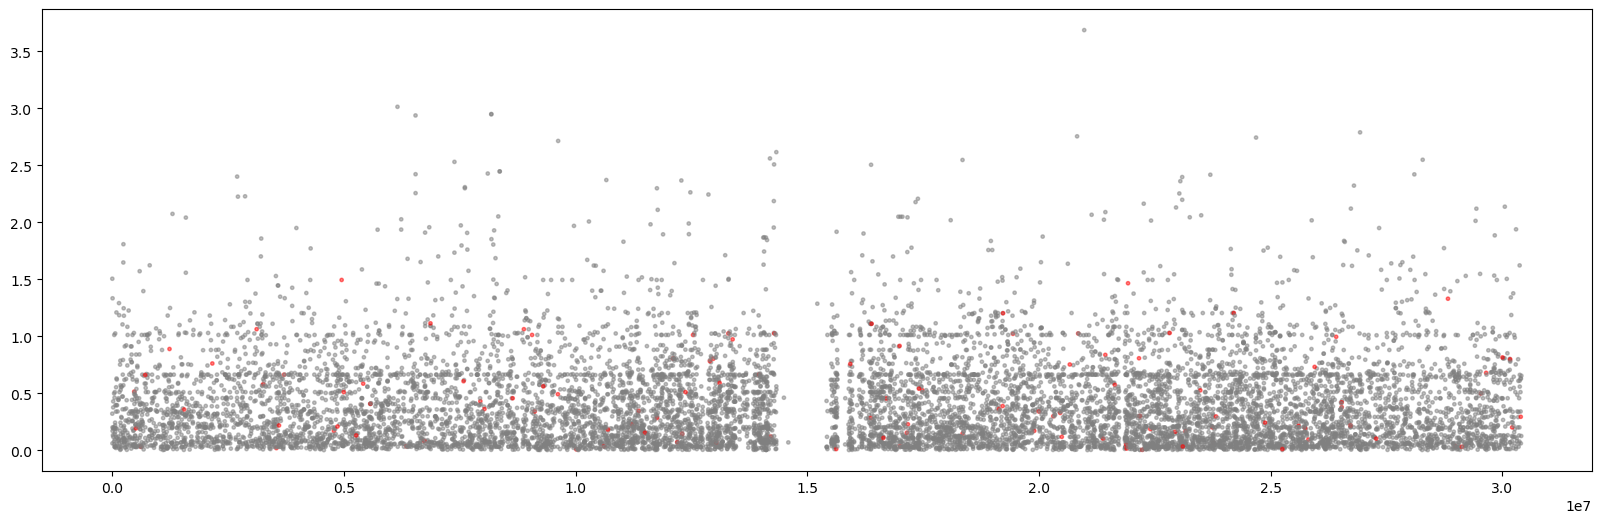

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 6))

plt.scatter(outlier_snp["snp_pos"], outlier_snp["p_value"], color=outlier_snp['color'], alpha=0.5, s=6)



# Show the plot
plt.show()